In [66]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [67]:
df = pd.read_csv('notebook/05-Seaborn/dm_office_sales.csv')
df

,division,level of education,training level,work experience,salary,sales
0,printers,some college,2,6,91684,372302
1,printers,associate's degree,2,10,119679,495660
2,peripherals,high school,0,9,82045,320453
3,office supplies,associate's degree,2,5,92949,377148
4,office supplies,high school,1,5,71280,312802
...,...,...,...,...,...,...
995,computer hardware,associate's degree,1,1,70083,177953
996,computer software,associate's degree,1,0,68648,103703
997,peripherals,associate's degree,2,8,108354,450011
998,peripherals,associate's degree,2,3,79035,330354


In [68]:
df['division'].value_counts()

office supplies      252
printers             250
peripherals          243
computer hardware    159
computer software     96
Name: division, dtype: int64

<AxesSubplot:xlabel='division', ylabel='count'>

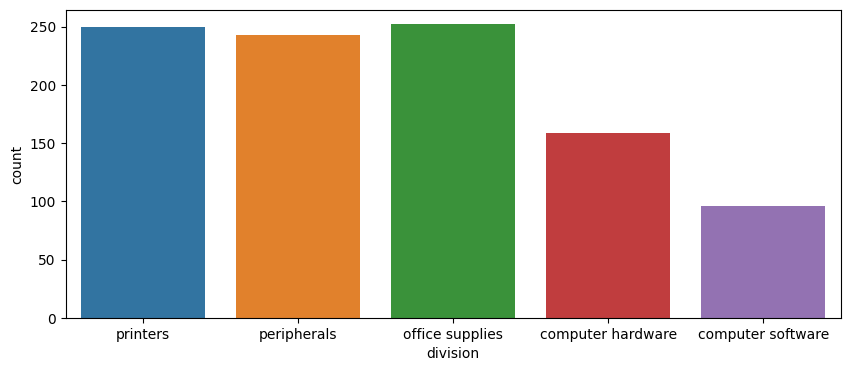

In [69]:
# we can visualise this with seaborn.countplot()
# remember this data has no mid states since it is categorical
plt.figure(figsize=(10,4), dpi=100)
sns.countplot(data=df, x = 'division')

<AxesSubplot:xlabel='division', ylabel='count'>

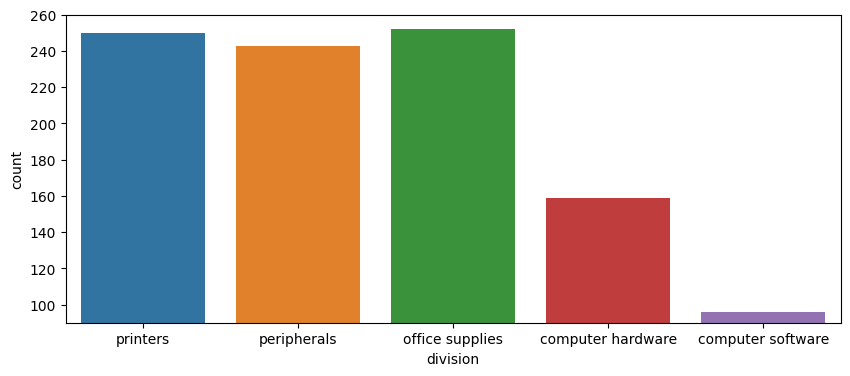

In [70]:
plt.figure(figsize=(10,4), dpi=100)
plt.ylim(90,260) # we apply ylim to set boundaries
sns.countplot(data=df, x = 'division')

Now repeat with level of education

<AxesSubplot:xlabel='level of education', ylabel='count'>

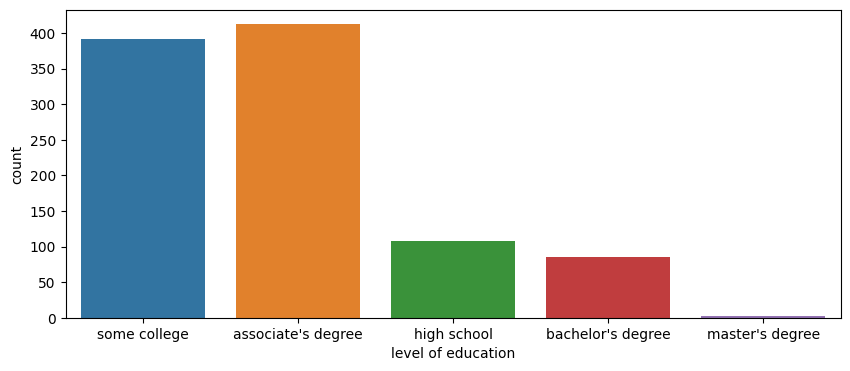

In [71]:
plt.figure(figsize=(10,4), dpi=100)
sns.countplot(data= df, x='level of education')
# it looks like there are no masters students

In [72]:
df['level of education'].value_counts()

associate's degree    412
some college          392
high school           108
bachelor's degree      85
master's degree         3
Name: level of education, dtype: int64

<AxesSubplot:xlabel='level of education', ylabel='count'>

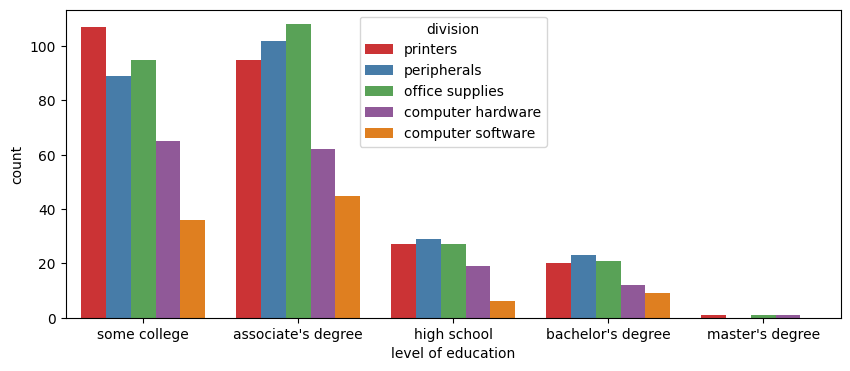

In [73]:
plt.figure(figsize=(10,4),dpi = 100)
sns.countplot(data=df, x = 'level of education', hue='division', palette='Set1')

<AxesSubplot:xlabel='level of education', ylabel='salary'>

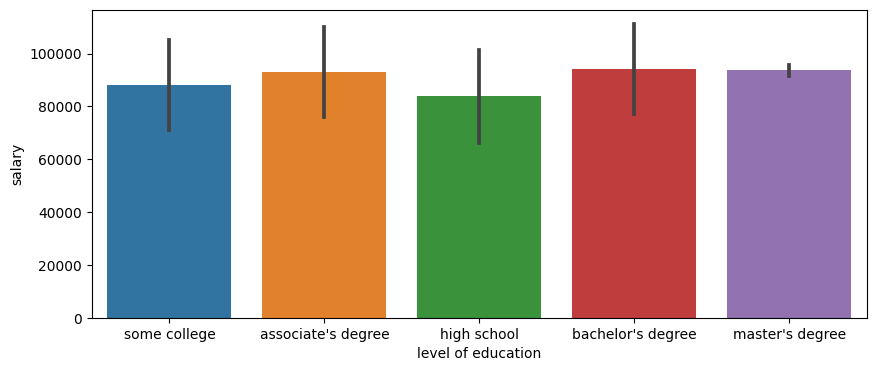

In [74]:
# countplot is essentialy a barplot with y being the count
# 3rd argument is the method of aggregation
# find the mean salary x level of education
# ci - confidence interval
# ci = 'sd' will hsow the standar deviation for the mean
plt.figure(figsize=(10,4))
sns.barplot(data = df, x = 'level of education', y = 'salary', estimator=np.mean, ci='sd')

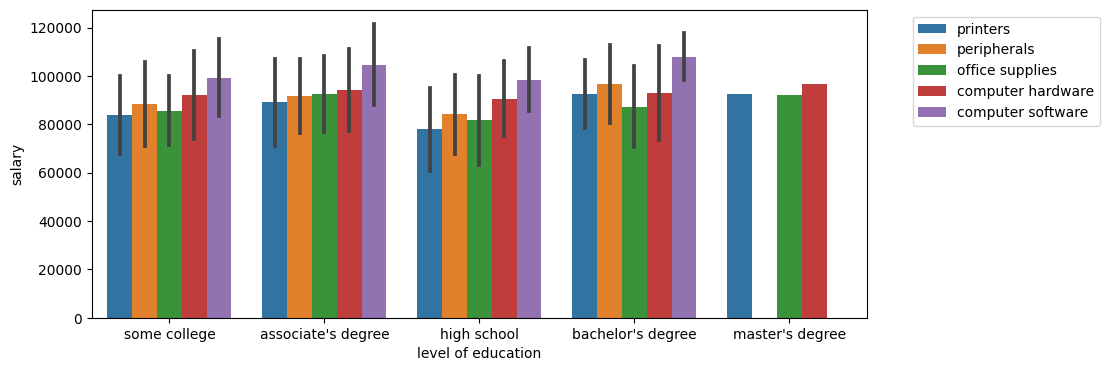

In [75]:
# You can add hue for an additional layer of information
plt.figure(figsize=(10,4), dpi=100)
sns.barplot(data= df, x = 'level of education', y = 'salary', ci = 'sd', hue='division')
# masters degree has no black line since those are the only 3 points
plt.legend(bbox_to_anchor=(1.05, 1))

* Box plot displays distribution of a continuous variable, displays the distribution through quartiles

In [76]:
df = pd.read_csv('notebook/05-Seaborn/StudentsPerformance.csv')
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


<AxesSubplot:xlabel='test preparation course', ylabel='math score'>

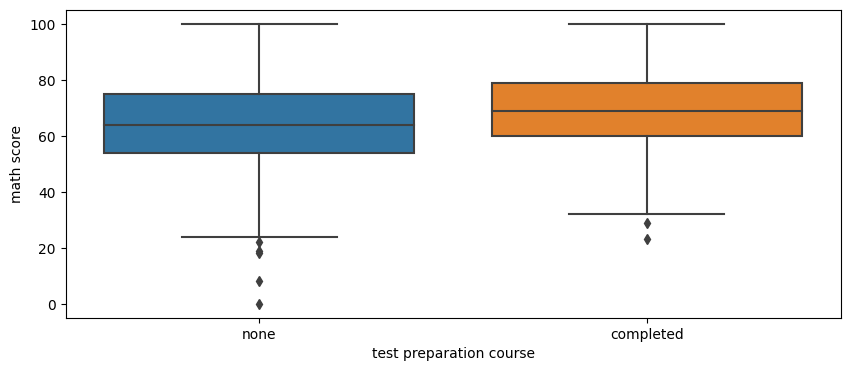

In [77]:
# box plot for math score
plt.figure(figsize=(10,4), dpi=100)
sns.boxplot(data=df, y= 'math score', x=  'test preparation course') # this will show the overall dist of the boxplot
# y - denots what distribution we want
# x - denotes the categories we want to study the distribution for
# students with preperation have performed better and have smaller deviation

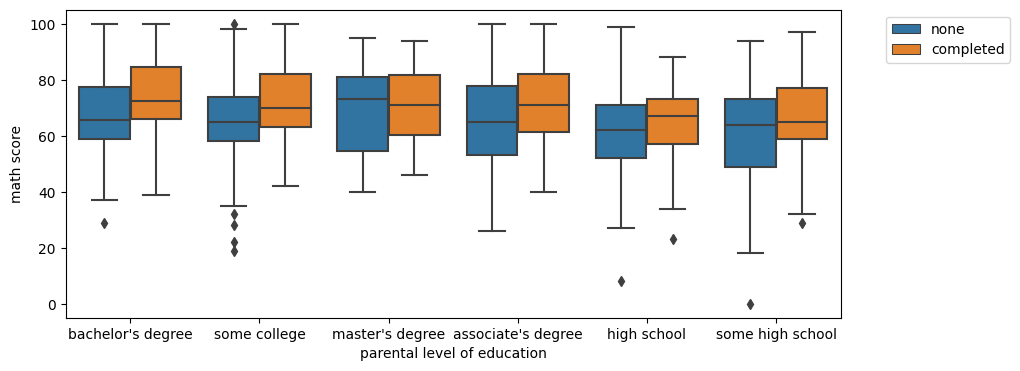

In [78]:
# how does the parental level of education impact test scores
plt.figure(figsize=(10,4), dpi=100)
sns.boxplot(data=df, y = 'math score', x= 'parental level of education', hue='test preparation course')
plt.legend(bbox_to_anchor=(1.05,1))

<AxesSubplot:xlabel='reading score', ylabel='parental level of education'>

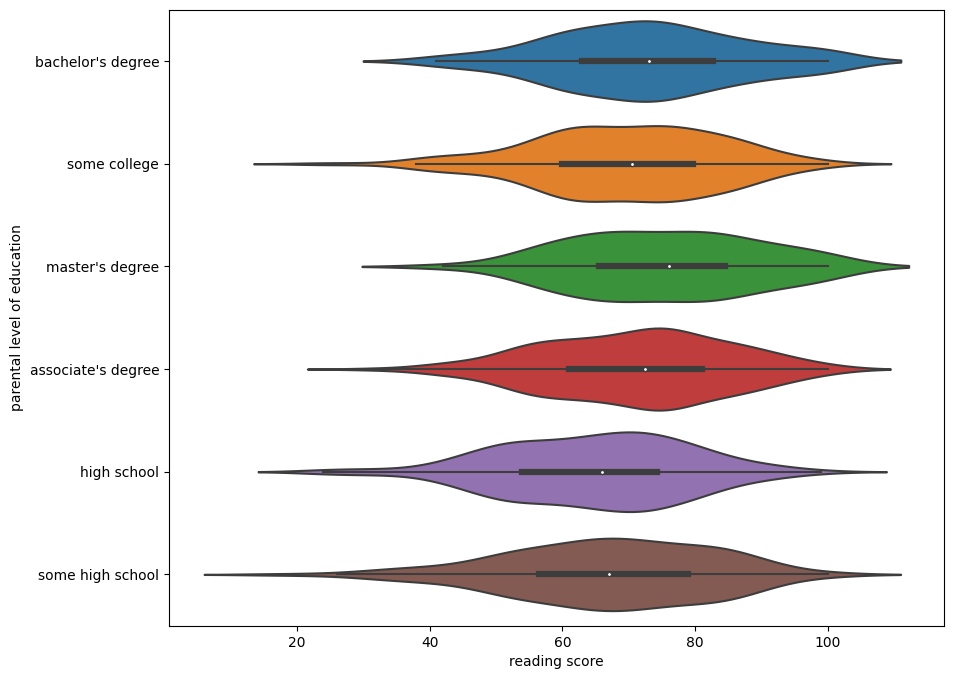

In [79]:
# Violin plot
plt.figure(figsize=(10,8))
sns.violinplot(data=df, x = 'reading score', y = 'parental level of education') 

<AxesSubplot:xlabel='reading score', ylabel='parental level of education'>

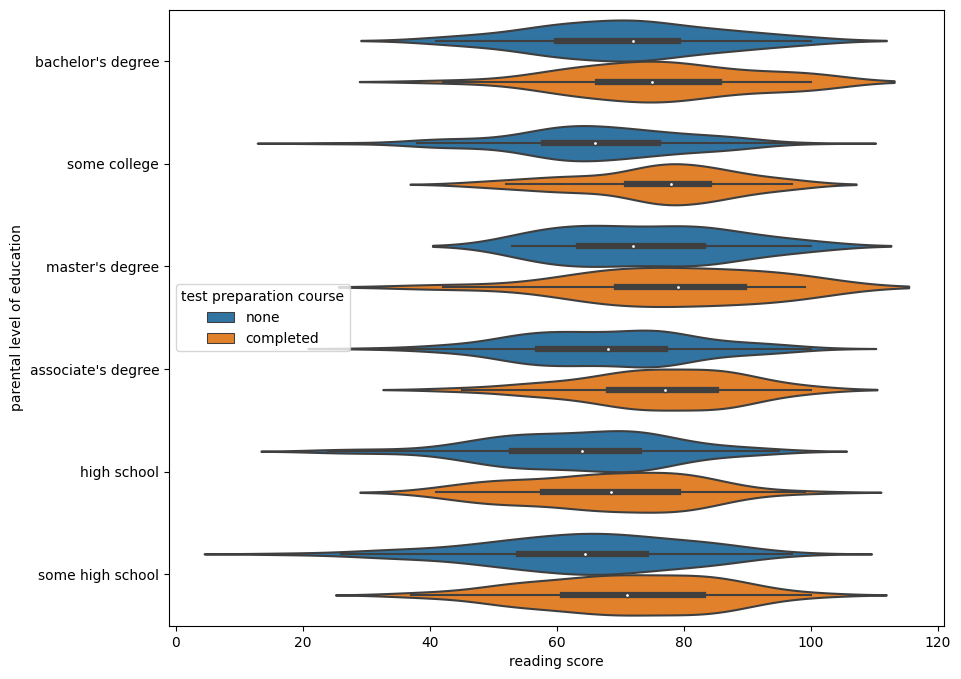

In [80]:
# violing plot 3d with hue
plt.figure(figsize=(10,8))
sns.violinplot(data=df, x = 'reading score', y = 'parental level of education', hue='test preparation course') 


<AxesSubplot:xlabel='reading score', ylabel='parental level of education'>

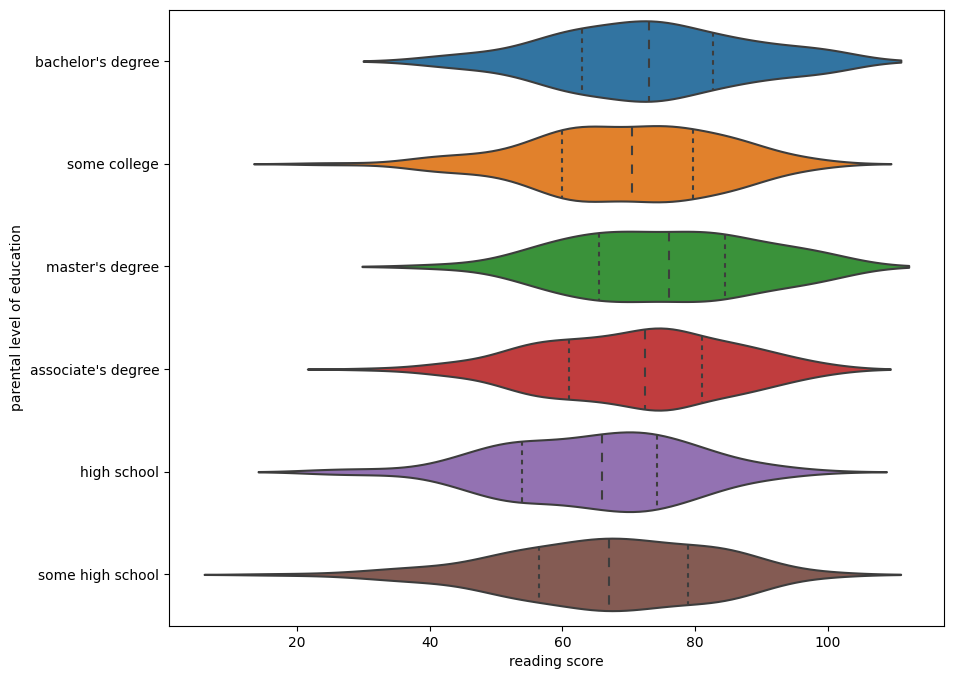

In [81]:
plt.figure(figsize=(10,8))
sns.violinplot(data=df, x = 'reading score', y = 'parental level of education', split=True, inner='quartile') # will draw the quartile lines

<AxesSubplot:xlabel='reading score', ylabel='parental level of education'>

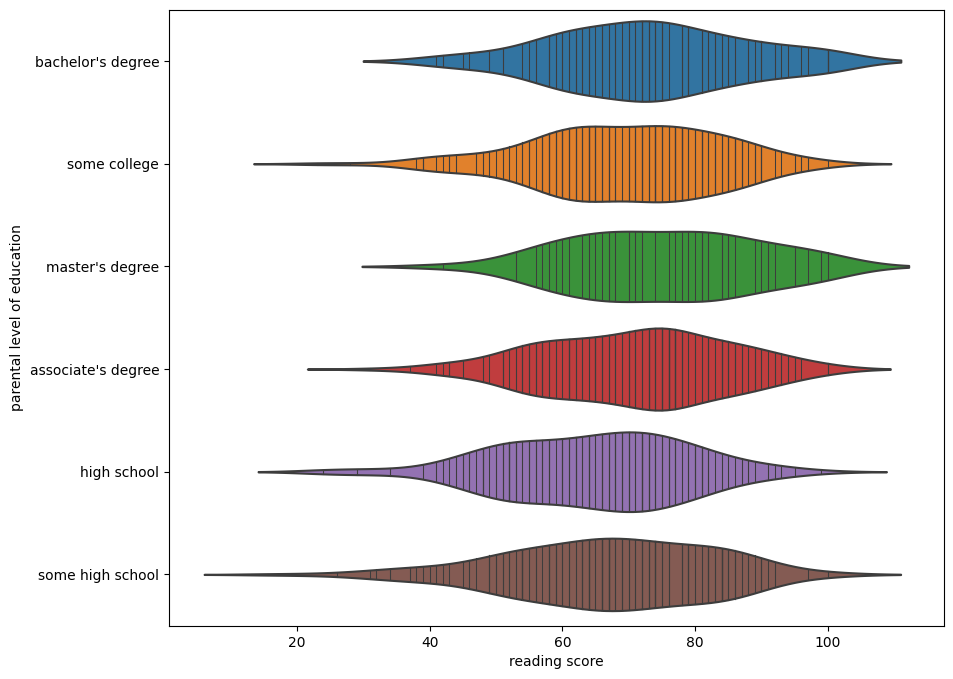

In [82]:
plt.figure(figsize=(10,8))
sns.violinplot(data=df, x = 'reading score', y = 'parental level of education', split=True, inner='stick') # will show a line for every distribution

<AxesSubplot:xlabel='reading score', ylabel='parental level of education'>

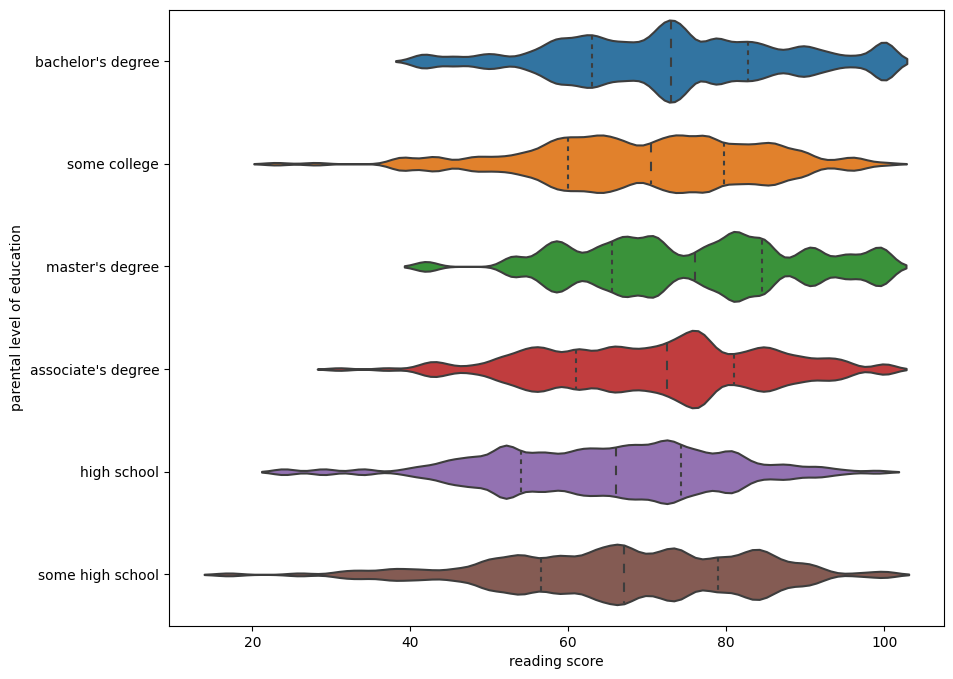

In [83]:
plt.figure(figsize=(10,8))
sns.violinplot(data=df, x = 'reading score', y = 'parental level of education', split=True, inner='quartile', bw=0.1) # will draw the quartile lines

Swarmplot

/home/zaimi/Desktop/python/venv/lib/python3.10/site-packages/seaborn/categorical.py:1296: UserWarning: 7.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='math score'>

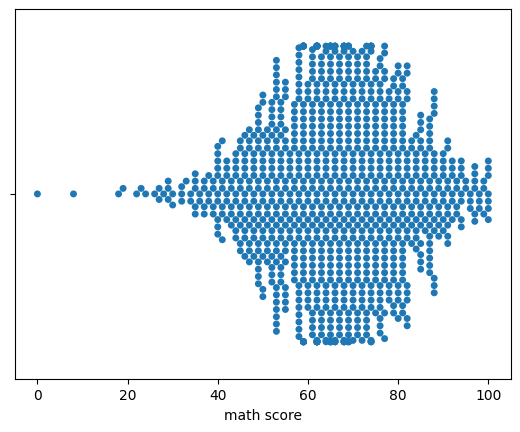

In [84]:
# Swarmplot
sns.swarmplot(data=df, x = 'math score')
# the dots are too big for them to fit in the plot

<AxesSubplot:xlabel='math score'>

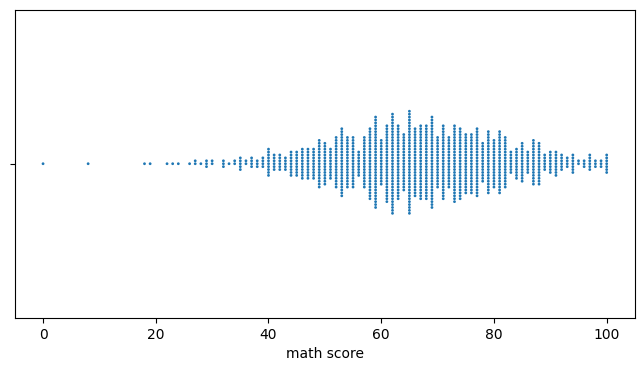

In [85]:
plt.figure(figsize=(8,4), dpi=100)
sns.swarmplot(data=df, x = 'math score', size = 2) # we will lower the size , this will show the distrbution for the math score

<AxesSubplot:xlabel='math score', ylabel='gender'>

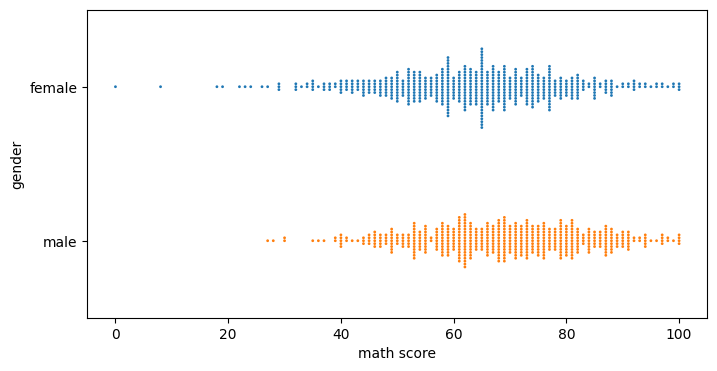

In [86]:
# We can show that y is a categorial value 
plt.figure(figsize=(8,4), dpi=100)
sns.swarmplot(data=df, x = 'math score', y = 'gender', size = 2)

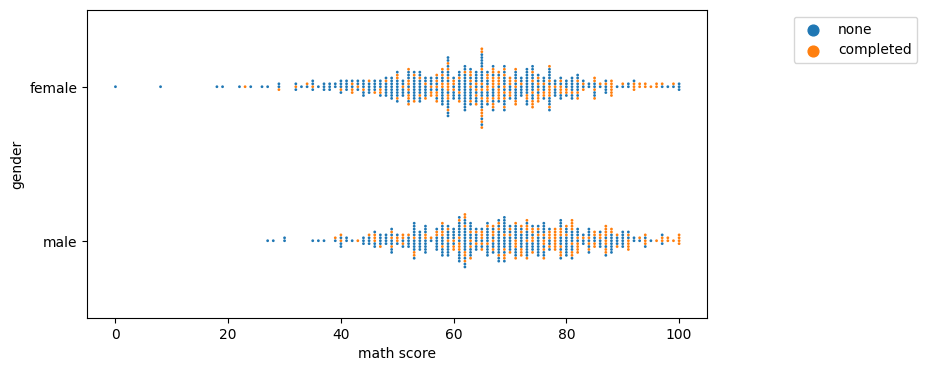

In [87]:
# We can show that y is a categorial value 
plt.figure(figsize=(8,4), dpi=100)
sns.swarmplot(data=df, x = 'math score', y = 'gender', size = 2, hue= 'test preparation course')
plt.legend(bbox_to_anchor=(1.35, 1))

<AxesSubplot:xlabel='math score', ylabel='gender'>

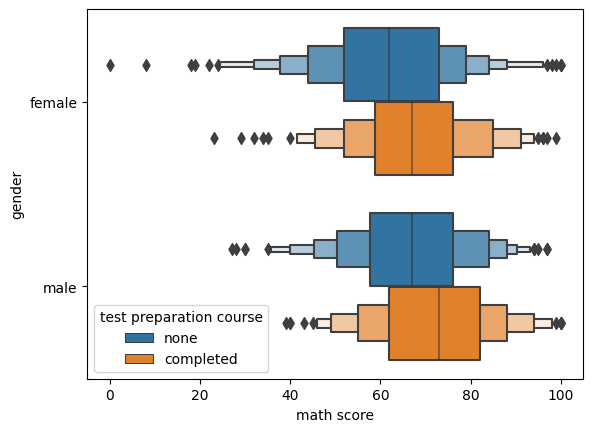

In [88]:
sns.boxenplot(data=df, x = 'math score', y ='gender', hue = 'test preparation course')

In [89]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
sns.boxplot(data= df, y = 'math score', x = '')